# Capítulo 5. Modelos de clasificación

## Árboles de decisión

In [7]:
def entropia(prob):  
    return -np.sum(prob * np.log2(prob))

In [8]:
import numpy as np
# Valores de probabilidad en el rango [0.01, 0.99]
probabilidades = np.linspace(0.01, 0.99, 100)

# Calcular la entropía para cada valor de probabilidad
entropias = [entropia([p, 1 - p]) for p in probabilidades]

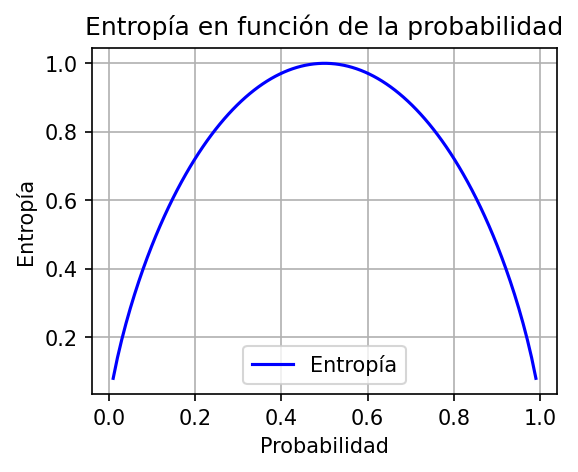

In [9]:
# Graficar la entropía en función de la probabilidad
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.figure(figsize=(4, 3))
plt.plot(probabilidades, entropias, label='Entropía', color='blue')
plt.title('Entropía en función de la probabilidad')
plt.xlabel('Probabilidad')
plt.ylabel('Entropía')
plt.grid(True)
plt.legend()
plt.show()

### Árbol de decisión con Scikit-learn

In [23]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("../datasets/desercion.csv")

In [71]:
# codificamos la variable genero
d = {'M': 1, 'F':0}
df['Género'] = df['Género'].map(d)

In [72]:
# codificamos la variable trabaja
d2 = {'SI': 1, 'NO':0}
df['Trabaja'] = df['Trabaja'].map(d2)

In [73]:
#Codificamos la columna Deserción
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Deserta'] = le.fit_transform(df.Deserta)

In [74]:
df

,Edad,Género,Trabaja,Deserta
0,28,1,0,0
1,26,0,0,1
2,28,1,1,1
3,26,1,1,1
4,26,0,1,1
5,32,1,0,0
6,32,0,0,0
7,28,1,1,0
8,28,1,1,1
9,28,0,0,0


In [75]:
# obtenemos X e y
X = df.iloc[:,[0,2]]
y = df['Deserta']

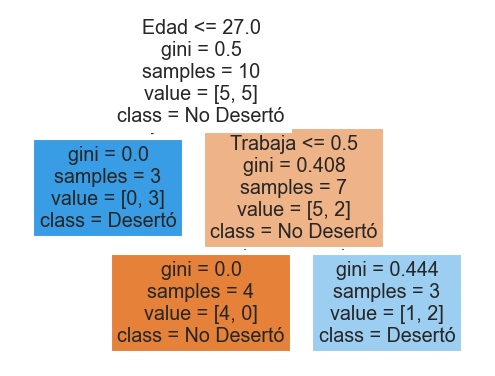

In [76]:
# Entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(criterion='gini', random_state=47)
clf.fit(X, y)

# Visualizar el árbol de decisión
plt.rcParams['figure.dpi'] = 150
plt.figure(figsize=(4, 3))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Desertó', 'Desertó'])
plt.show()

In [77]:
df_prueba = pd.DataFrame({'Edad': [37], 'Trabaja': [1]})
print("Predicción:", clf.predict(df_prueba)[0])

Predicción: 1


In [78]:
df_prueba2 = pd.DataFrame({'Edad': [29], 'Trabaja': [0]})
print("Predicción:", clf.predict(df_prueba2)[0])

Predicción: 0


### Árbol de decisión para datos bancarios

In [232]:
# importamos las librerías necesarias
import numpy as np
import pandas as pd

In [527]:
df = pd.read_csv("../datasets/abandono_banco.csv")
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [528]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [529]:
# borramos las columnas no relevantes para nuestras pretensiones
df.drop(columns=["RowNumber","CustomerId","Surname"], inplace=True)

In [530]:
#Codificamos las columnas Geography y Gender.
d = {'France': 1, 'Spain': 2, 'Germany': 3 }
df['Geography']=df['Geography'].map(d)
d2 = {'Female': 1, 'Male': 2}
df['Gender']=df['Gender'].map(d2)

In [531]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 10].values

In [532]:
# se separan los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [533]:
# Se escalan las caracteristicas
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [534]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(criterion= 'entropy',random_state= 11)

arbol.fit(X_train, y_train)
print("Exactitud del conjunto de entrenamiento: {:.2f}".format(arbol.score(X_train, y_train)))
print("Exactitud del conjunto de prueba: {:.2f}".format(arbol.score(X_test, y_test)))

Exactitud del conjunto de entrenamiento: 1.00
Exactitud del conjunto de prueba: 0.79


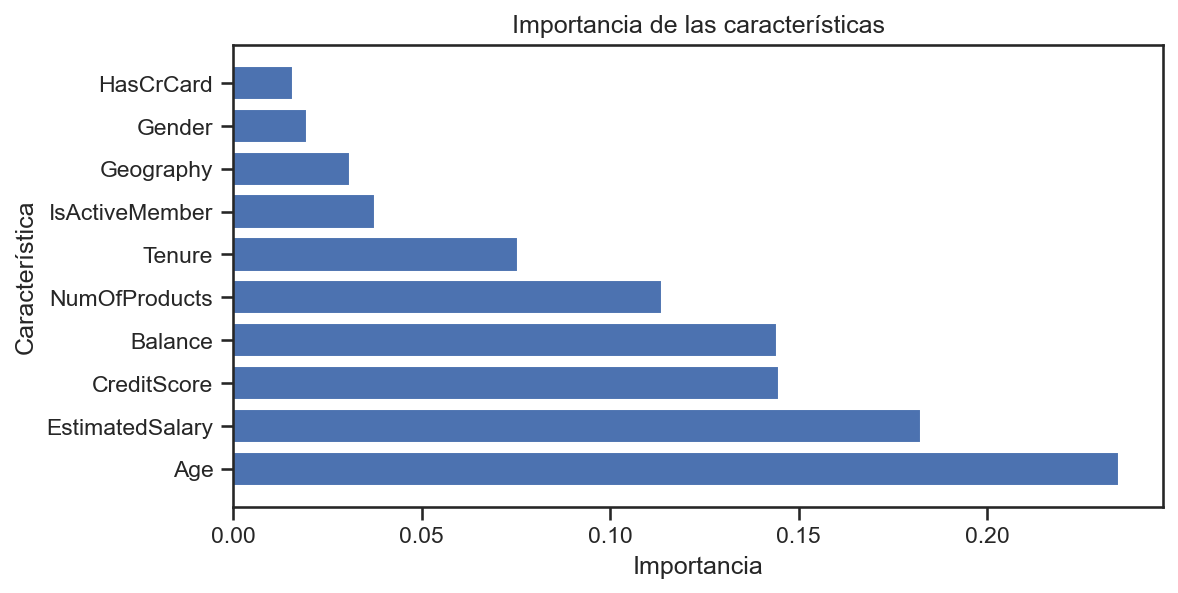

In [535]:
import matplotlib.pyplot as plt	
# Obtener la importancia de las características
importantes = arbol.feature_importances_
# Crear un DataFrame con las características y su importancia
df2 = pd.DataFrame({'Característica': df.columns[:-1] , 'Importancia': importantes})

# Ordenar el DataFrame por importancia de características
df2 = df2.sort_values(by='Importancia', ascending=False)

# Graficar las características importantes
plt.figure(figsize=(8, 4))
plt.barh(df2['Característica'], df2['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características')
plt.show()

In [536]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Bosque Aleatorio

In [537]:
from sklearn.ensemble import RandomForestClassifier
bosque = RandomForestClassifier(random_state=0, criterion='gini', n_estimators=100)

bosque.fit(X_train, y_train)
print("Exactitud del conjunto de entrenamiento: {:.2f}".format(bosque.score(X_train, y_train)))
print("Exactitud del conjunto de prueba: {:.2f}".format(bosque.score(X_test, y_test)))

Exactitud del conjunto de entrenamiento: 1.00
Exactitud del conjunto de prueba: 0.85


### Máquina de Soporte Vectorial

In [581]:
# seleccionamos las variables descriptivas y la etiqueta
X = df.iloc[:100, [0,3]].values
y = df.iloc[:100, 10].values

# se separan los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

# Se escalan las caracteristicas
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

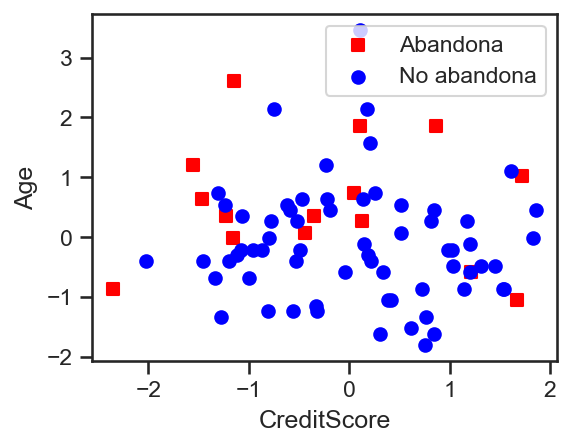

In [582]:
plt.rcParams['figure.dpi'] = 150
plt.figure(figsize=(4,3)) #change figure-size for easier viewing
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', marker='s', label='Abandona')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', marker='o', label='No abandona')
plt.xlabel("CreditScore")
plt.ylabel("Age")
plt.legend(loc='best')

In [583]:
#Balancea las clases mediante submuestreo aleatorio (reduciendo puntos de la clase 0):
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

### SVM Lineal

In [584]:
from sklearn import svm
# Creamos un objeto SVM
modelo = svm.SVC(kernel='linear')

# Entrenamos el modelo usando el conjunto de entrenamiento
modelo.fit(X_train, y_train)

# Realizamos una predicción con los datos de prueba
predicciones = modelo.predict(X_test)

In [585]:
# Obtenemos la exactitud del modelo
from sklearn.metrics import accuracy_score
print(f"Exactitud: {accuracy_score(y_test, predicciones):.2f}")

Exactitud: 0.60


In [586]:
# Ver vectores de soporte
modelo.support_vectors_

array([[-0.49258774, -0.20816457],
       [-0.86544082, -0.20816457],
       [-0.32391611, -1.24310709],
       [ 0.14658896, -0.11407889],
       [ 0.20873114,  1.5794634 ],
       [ 1.61136892,  1.10903499],
       [ 0.13771151,  0.63860657],
       [-0.99860264, -0.67859299],
       [-0.56360738, -1.24310709],
       [ 1.85993763,  0.45043521],
       [-0.35054847,  0.35634952],
       [-0.43932302,  0.07409248],
       [ 1.6735111 , -1.05493572],
       [ 0.04893697,  0.73269226],
       [ 0.86566276,  1.86172045],
       [-1.22941645,  0.35634952],
       [-1.15839681, -0.01999321],
       [ 1.21188347, -0.5845073 ],
       [ 1.71789837,  1.0149493 ],
       [ 0.12883405,  0.26226384],
       [-2.34797568, -0.86676435]])

### SVM con Kernel RBF

In [597]:
from sklearn import svm
# Creamos un objeto SVM
modelo = svm.SVC(kernel='rbf', C=0.1, gamma=10)

# Entrenamos el modelo usando el conjunto de entrenamiento
modelo.fit(X_train, y_train)

# Realizamos una predicción con los datos de prueba
predicciones = modelo.predict(X_test)

In [598]:
# Obtenemos la exactitud del modelo
from sklearn.metrics import accuracy_score
print(f"Exactitud: {accuracy_score(y_test, predicciones):.2f}")

Exactitud: 0.70


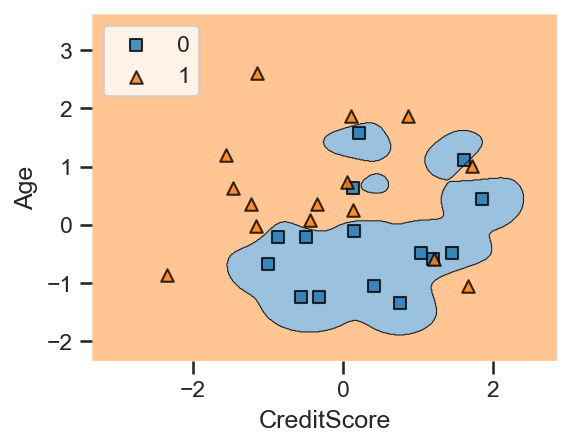

In [599]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4, 3))
plot_decision_regions(X_train, y_train, clf=modelo)
plt.legend(loc='upper left')
plt.xlabel('CreditScore')
plt.ylabel('Age')
plt.show()

### Búsqueda de cuadrícula para encontrar los hiperparámetros óptimos

In [607]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
model = svm.SVC(kernel='rbf')
 
grilla = {
    'kernel': ['rbf', 'poly'],
    'C': [0.1, 1, 10, 50],
    'gamma': [0.1, 1, 10, 50],          
}
 
busqueda = GridSearchCV(estimator=model, param_grid=grilla, cv=5, verbose=1)
busqueda.fit(X_train, y_train) # Entrenar el modelo con diferentes combinaciones

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50], 'gamma': [0.1, 1, 10, 50],
                         'kernel': ['rbf', 'poly']},
             verbose=1)

In [609]:
mejor_modelo = busqueda.best_estimator_
print(mejor_modelo)

SVC(C=0.1, gamma=1)


In [611]:
# Realizamos una predicción con los datos de prueba
predicciones = mejor_modelo.predict(X_test)

# Obtenemos la exactitud del modelo
from sklearn.metrics import accuracy_score
print(f"Exactitud: {accuracy_score(y_test, predicciones):.2f}")

Exactitud: 0.65


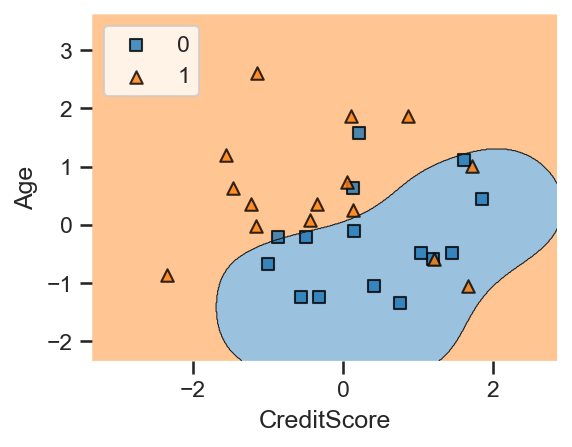

In [613]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4, 3))
plot_decision_regions(X_train, y_train, clf=mejor_modelo)
plt.legend(loc='upper left')
plt.xlabel('CreditScore')
plt.ylabel('Age')
plt.show()

### SVM con diferentes valores de C y gamma

In [603]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Configuración de valores de C y gamma
C = [0.1, 1, 10]
gammas = [0.1, 1, 10]

# Función para trazar la frontera de decisión
def dibujar_grafico(X, y, model, ax, title):

    # Crear malla para trazar la frontera de decisión   
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
    
    # Predecir en el grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Visualizar la frontera
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    ax.contourf(xx, yy, Z, alpha=0.5, cmap=cmap_light)
    
     # Visualizar los puntos de datos
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='coolwarm', edgecolors='k')                
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize = 8)

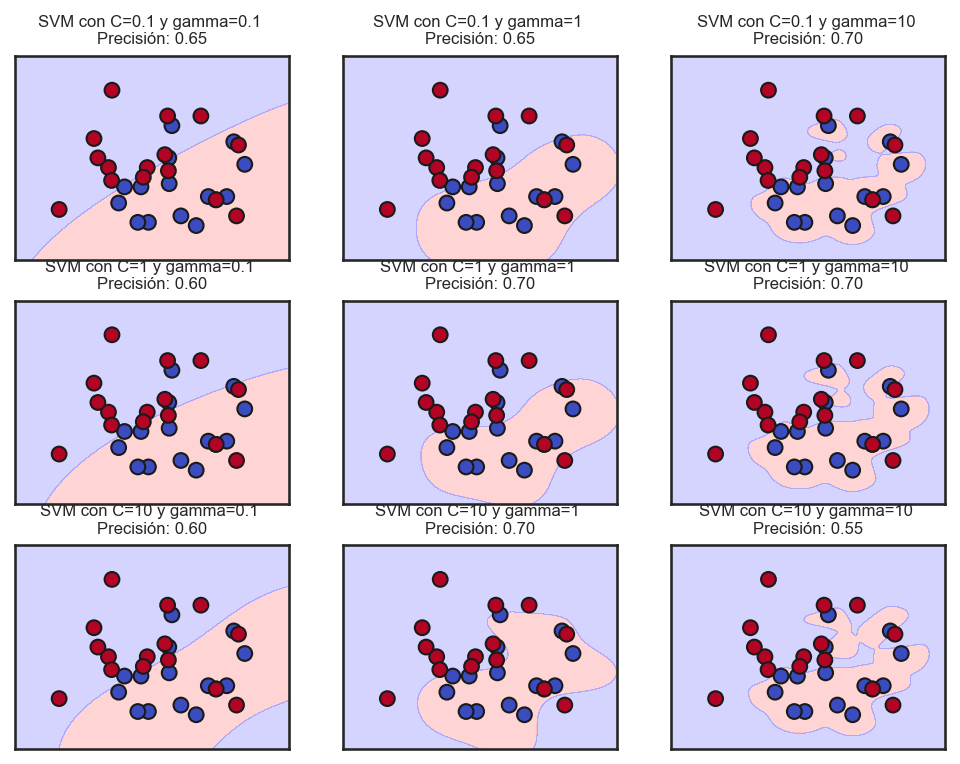

In [604]:
# Crear subplots
fig, axes = plt.subplots(len(C), len(gammas), figsize=(8, 6))
#plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Entrenar SVM y trazar fronteras de decisión
for i, C in enumerate(C):
    for j, gamma in enumerate(gammas):
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        exactitud = model.score(X_test, y_test)        
        titulo = f"SVM con C={C} y gamma={gamma} \nPrecisión: {exactitud:.2f}"
        dibujar_grafico(X_train, y_train, model, axes[i, j], titulo)
plt.show()

### SVM para clasificación de imágenes

In [614]:
from sklearn.datasets import load_digits
digitos = load_digits()
print(digitos.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [615]:
print(digitos.images.shape)

(1797, 8, 8)


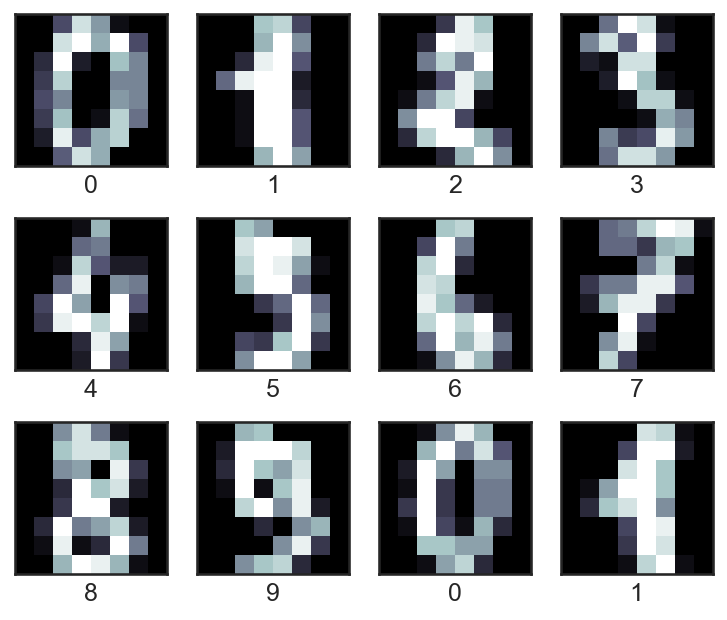

In [635]:
fig, ax = plt.subplots(3, 4, figsize=(6, 5))
for i, axi in enumerate(ax.flat):
       axi.imshow(digitos.images[i], cmap='bone')
       axi.set(xticks=[], yticks=[], xlabel=digitos.target_names[digitos.target[i]])

In [636]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=5)
svc = SVC(kernel='rbf')
model = make_pipeline(pca, svc)

In [637]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digitos.data, digitos.target, random_state=42)

In [638]:
from sklearn.model_selection import GridSearchCV
grilla = {'C': [1, 5, 10, 50],
               'gamma': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(svc, grilla)

grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 5, 'gamma': 0.01}


In [639]:
# obtenemos el mejor modelo
modelo = grid.best_estimator_
predicciones = modelo.predict(X_test)

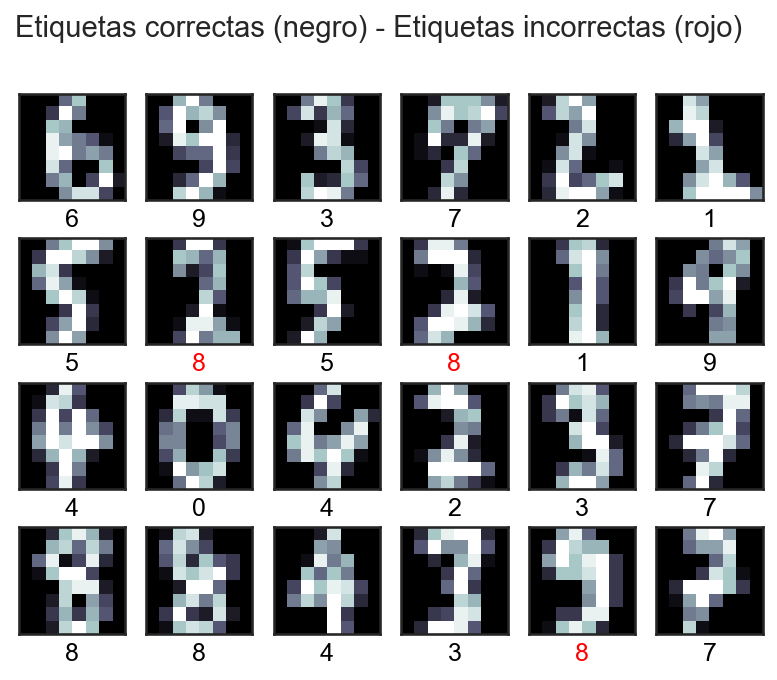

In [633]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
 axi.imshow(X_test[i].reshape(8, 8), cmap='bone')
 axi.set(xticks=[], yticks=[])
 etiqueta = str(digitos.target_names[predicciones[i]])
 axi.set_xlabel(etiqueta,
                color='black' if predicciones[i] == y_test[i] else 'red')
fig.suptitle('Etiquetas correctas (negro) - Etiquetas incorrectas (rojo)', size=14);

In [640]:
from sklearn.metrics import accuracy_score
print(f"Exactitud: {accuracy_score(y_test, predicciones):.2f}")

Exactitud: 0.79


### Regresión Logística

In [873]:
#cargamos la data y visualizamos las primeras 5 filas
df = pd.read_csv("../datasets/diabetes.csv")
df.head(4)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0


In [874]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [875]:
# seleccionamos HbA1c_level en X y diabetes para y
X = df.iloc[:, [6]]
y = df.iloc[:, 8].values

In [876]:
# se separan los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

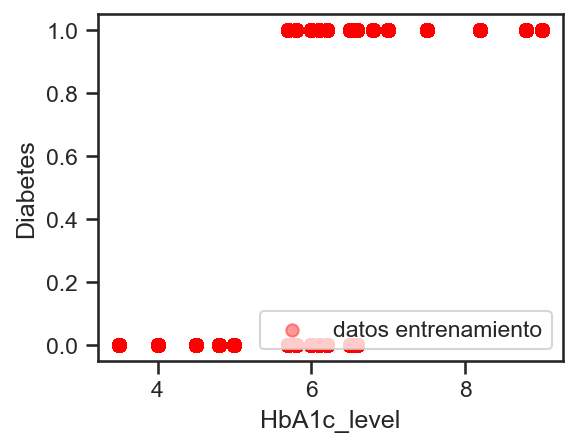

In [877]:
plt.figure(figsize=(4,3))
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.legend(loc='lower right')
plt.xlabel(r'HbA1c_level')
plt.ylabel(r'Diabetes')
plt.show()

In [878]:
# Se escalan las caracteristicas
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [879]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000) 
#Ajustando el modelo a los conjuntos de entrenamiento y prueba 
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [880]:
#Puntuación de exactitud del modelo de regresión logística 
print("La exactitud del modelo es: ", round(lr.score(X_test, y_test),2))

La exactitud del modelo es:  0.94


In [881]:
W0 = lr.intercept_[0]
W1 = lr.coef_[0][0]
print("Coeficientes:", W0, W1)

Coeficientes: -3.909869662805184 2.574922836053886


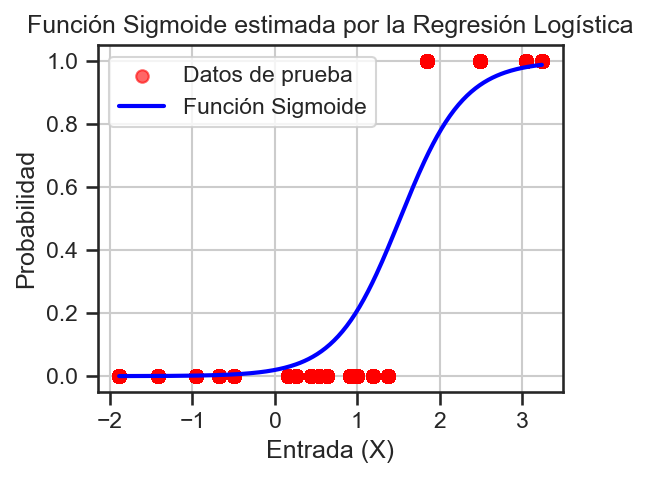

In [882]:
# Crear un rango continuo de valores para X
rango_X = np.linspace(X_test.min(), X_test.max(), 300).reshape(-1, 1)

# Calcular la función sigmoide para el rango generado
sigmoide = 1 / (1 + np.exp(-(W0 + W1 * rango_X)))

# Predicciones de los datos reales
y_pred = lr.predict(X_test)
# Graficar la función logit
plt.figure(figsize=(4, 3))
plt.scatter(X_test, y_pred, color='red', alpha=0.6, label="Datos de prueba")  # Datos reales
plt.plot(rango_X, sigmoide, color='blue', label="Función Sigmoide", linewidth=2)  # Curva sigmoide
plt.xlabel("Entrada (X)")
plt.ylabel("Probabilidad")
plt.title("Función Sigmoide estimada por la Regresión Logística")
plt.legend(loc='best')
plt.grid()
plt.show()

In [883]:
# seleccionamos HbA1c_level y blood_glucose_level en X y diabetes para y
X = df.iloc[:, [6,7]]
y = df.iloc[:, 8].values

In [884]:
# se separan los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [885]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(max_iter=1000) 
#Ajustando el modelo a los conjuntos de entrenamiento y prueba 
lr2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [886]:
#Puntuación de exactitud del modelo de regresión logística 
print("La exactitud del modelo es: ", round(lr2.score(X_test, y_test),2))

La exactitud del modelo es:  0.95


In [887]:
df_persona_x = pd.DataFrame({"HbA1c_level":[8], "blood_glucose_level":[120]})
prediccion = lr2.predict(df_persona_x)[0]
probabilidad = lr2.predict_proba(df_persona_x)

In [888]:
if (prediccion == 1):
    print("Alto riesgo de diabetes - Probabilidad: ", round(probabilidad[0][1],2))
else:
    print("Bajo riesgo de diabetes - Probabilidad: ", round(probabilidad[0][1],2))

Alto riesgo de diabetes - Probabilidad:  0.67


C:\Users\Carlos Pineda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


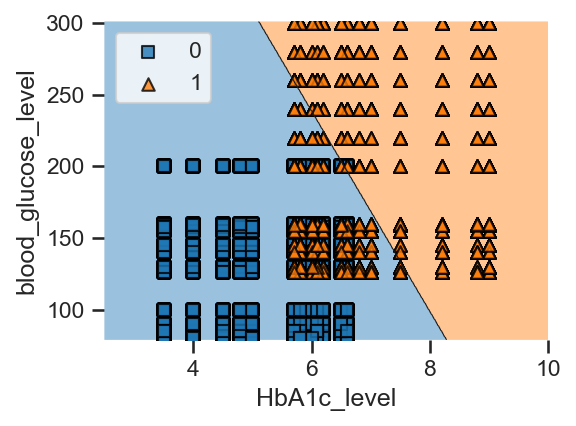

In [889]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4, 3))
plot_decision_regions(X_test.values, y_test, clf=lr2)
plt.legend(loc='upper left')
plt.xlabel('HbA1c_level')
plt.ylabel('blood_glucose_level')
plt.tight_layout()
plt.show()

In [890]:
print(lr2.coef_)

[[2.40278651 0.0343546 ]]


In [891]:
print(lr2.intercept_)

[-22.61466854]


In [896]:
# Evaluación del modelo

In [892]:
from sklearn.metrics import confusion_matrix
y_pred = lr2.predict(X_test)
confusion_matrix(y_test, y_pred, labels = [0,1])

array([[18197,   117],
       [  784,   902]], dtype=int64)

In [827]:
y_pred_proba = lr2.predict_proba(X_test)

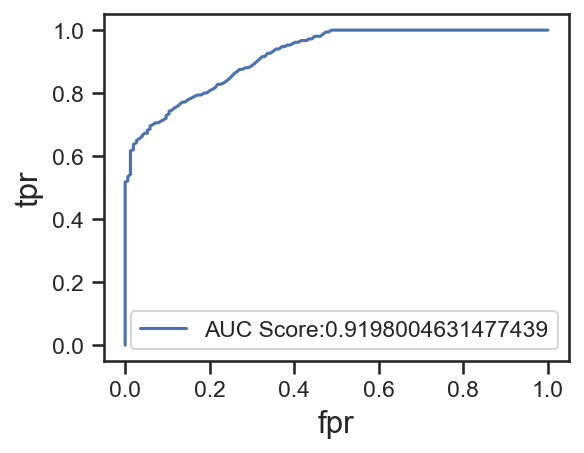

In [829]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])

auc_score = auc(fpr,tpr)
plt.rcParams['figure.dpi'] = 150
plt.figure(figsize=(4,3)) 
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')

### Regresión logistica Multiclase

In [834]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [835]:
datos = '../datasets/fashion/fashion-mnist_train.csv'
df = pd.read_csv(datos, delimiter=',')


# Initiate the label values
etiquetas = {0:'T-shirt/top',
          1:'Trouser',
          2:'Pullover',
          3:'Dress',
          4:'Coat',
          5:'Sandal',
          6:'Shirt',
          7:'Sneaker',
          8:'Bag',
          9:'Ankle boot'}

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Etiqueta:  Ankle boot


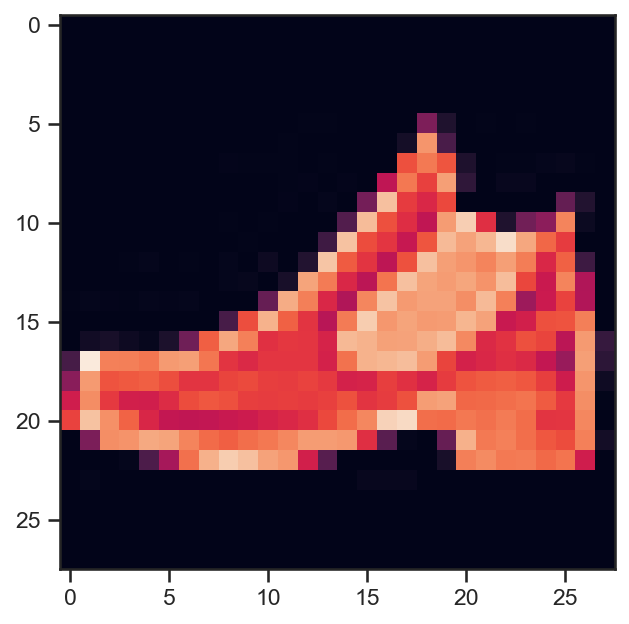

In [836]:
# seleccionamos las caracteristicas y las etiquetas
X = df[df.columns[1:]]
y = df['label']

# Mostremos una observación
caracteristicas = X.loc[1].values 
print("Etiqueta: ", etiquetas[y.loc[1]])
plt.imshow(caracteristicas.reshape(28,28));

In [837]:
# Escalamos los valores a un rango entre 0 y 1 dividiendolos entre 255
X = X/255
# separamos los datos en subconjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [838]:
modelo = LogisticRegression(solver='sag', multi_class='multinomial')
modelo.fit(X_train, y_train)

C:\Users\Carlos Pineda\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [839]:
print(f"Exactitud con datos de entrenamiento: {accuracy_score(y_train, modelo.predict(X_train)):.2f}")
print(f"Exactitud con datos de prueba: {accuracy_score(y_test, modelo.predict(X_test)):.2f}")

Exactitud con datos de entrenamiento: 0.88
Exactitud con datos de prueba: 0.85


### K Vecinos más cercanos

In [925]:
# importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [926]:
#cargamos la data y visualizamos las primeras 5 filas
df = pd.read_csv("../datasets/diabetes.csv")
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [927]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [928]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [929]:
#preprocesamos las variables categóricas
df = pd.get_dummies(df, columns=['gender','smoking_history'], drop_first=True)
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,False,False,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,False,False,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,True,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,False,False,False,False,False,True,False


In [930]:
# seleccionamos edad y nivel de glucosa para X y diabetes para y
X = df.iloc[:, [0,5]].values
y = df.iloc[:, 6].values

In [931]:
# se separan los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [932]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [933]:
y_pred = knn.predict(X_test)
print(f"Exactitud: {accuracy_score(y_test, y_pred):.2f}")

Exactitud: 0.94


In [934]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [935]:
ejemplo = np.array([[50, 130]])

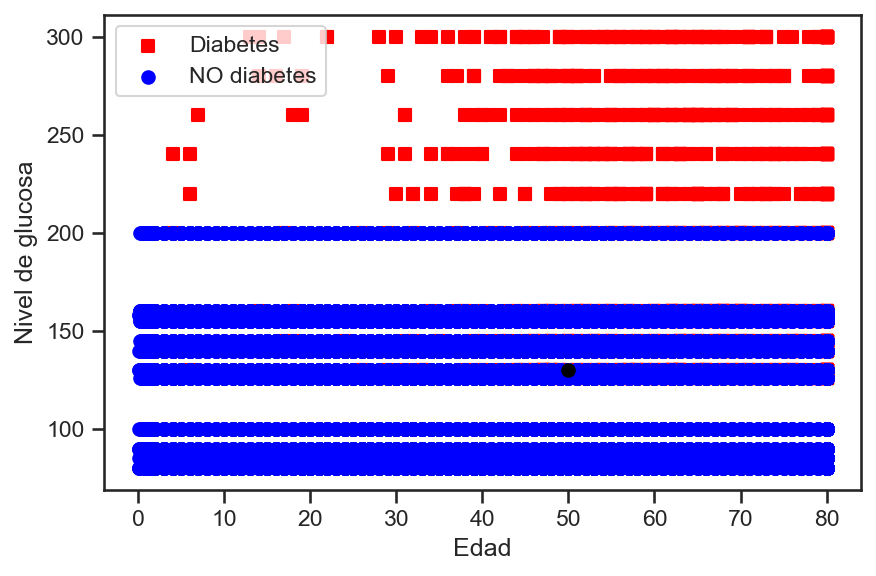

In [936]:
plt.figure(figsize=(6,4)) 
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='red', marker='s', label='Diabetes')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='blue', marker='o', label='NO diabetes')
plt.scatter(ejemplo[0][0],ejemplo[0][1], color = 'black')

plt.xlabel('Edad')
plt.ylabel('Nivel de glucosa')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [937]:
p = knn.predict(ejemplo)[0]
print(f"Predicción para la instancia de prueba: {'Diabetes' if p == 1 else 'No Diabetes'}")

Predicción para la instancia de prueba: No Diabetes


In [938]:
# exportar
import joblib
joblib.dump(knn, 'modelo_diabetes.pkl')

['modelo_diabetes.pkl']

### Métricas de evaluación

In [939]:
#Exactitud
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy:.2f}")

Exactitud: 0.94


In [940]:
#Precisión
from sklearn.metrics import precision_score

precision = accuracy_score(y_test, y_pred)
print(f"Precisión: {precision:.2f}")

Precisión: 0.94


In [941]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred,  labels = [0,1])
print("Matriz de confusión:\n", cm)

Matriz de confusión:
 [[18111   203]
 [  998   688]]


In [942]:
#Recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Sensibilidad: {recall:.2f}")

Sensibilidad: 0.41


In [943]:
#F1-Score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.53


AUC-ROC: 0.81


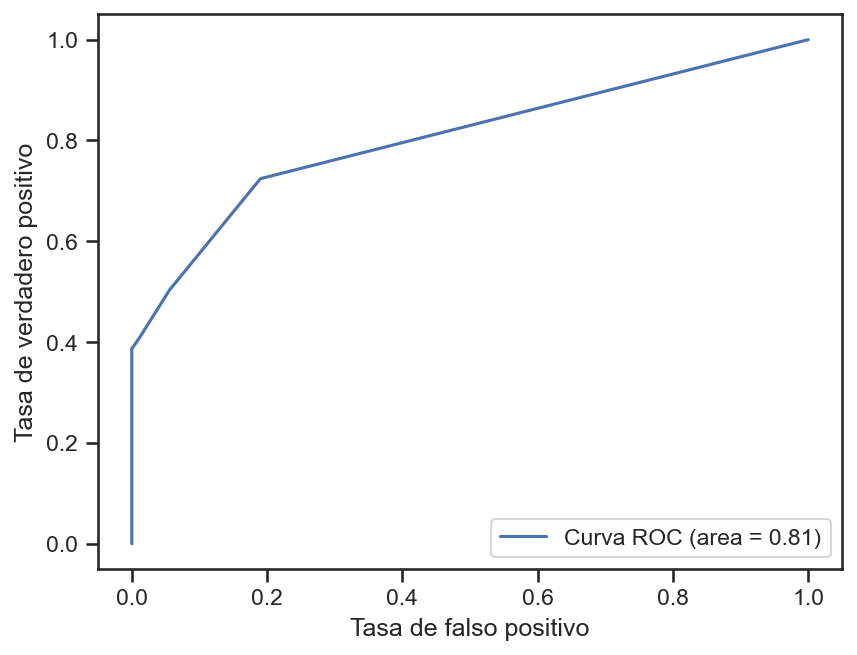

<Figure size 750x450 with 0 Axes>

In [946]:
# AUC y Curva ROC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilidades predichas para la clase positiva
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {auc:.2f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="Curva ROC (area = %0.2f)" % auc)
plt.xlabel("Tasa de falso positivo")
plt.ylabel("Tasa de verdadero positivo")
plt.legend(loc="lower right")
plt.figure(figsize=(5,3))
plt.show()